# Recommendation chess openings
<img src="https://media.architecturaldigest.com/photos/5d5d869e7d6e1a000806a7e0/master/w_2974,h_1854,c_limit/130760%20Chess%20Set%20HI%20RES.jpg" alt="Chess" width=500  />

## Project description

Chess game consists of 3 main parts:
1. Opening
2. Middlegame
3. Endgame

An opening is simply the first several moves made in a chess game. Most likely, they'll follow one of hundreds of classic sequences (or one of the hundreds of variations on those sequences). More broadly, though, an opening refers to the first phase of a chess game, as distinguished from the middlegame and endgame. 

The middlegame is the portion of a chess game between the opening and the endgame. It is generally considered to begin when each player has completed the development of all or most of their pieces and brought their king to relative safety, and it is generally considered to end when only a few pieces remain on the board. However, there is no clear line between the opening and middlegame or between the middlegame and endgame. At master level, the opening analysis may go well into the middlegame; likewise, the middlegame blends into the endgame.

The endgame in chess is the phase of the game that occurs after most of the pieces have been exchanged—the stage of the game that happens at the end. Not every game of chess reaches the endgame, as some games are decided in the middlegame (or even by early checkmates in the opening). However, most games do reach the endgame stage. 

An opening is the first part of the chess game, and players must study it, to make their own repertoire. So, in this project, I have made chess opening recommendations by players' history games. For example, if I would play against Pera Petrovic, I could have downloaded all his games from lichess.org. I have been using API from lichess.com. Here is the link of the documentation: https://berserk.readthedocs.io/en/master/
As I said, openings must be taught and every player has his own repertoire. Chess players prepare against the chess opponent and analyze his repertoire.

## Code

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime 

### Import data

In [2]:
# All my games from Lichess
my_games = pd.read_csv('my_games.csv')
# My rating time series - every chess player has his own rating, something similar like in tennis ATP points.
my_rating_history = pd.read_csv('rating_history.csv', index_col=[0])

I took 14 variables:
1. game_id - game id of my games
2. white_player - nickname of white player
3. black_player - nickname of black player
4. white_elo - rating of white player
5. black_elo - rating of black player
6. game_started_at - time when game started
7. game_ended_at - time then game ended
8. moves - It is notation format of chess game; You can see here: https://www.chess.com/terms/chess-notation#:~:text=Conclusion-,What%20Is%20Chess%20Notation%3F,for%20chess%20notation%3A%20algebraic%20notation.
9. winner - who is winner of the game
10. status - how was the game ended (mate, out of time, draw...)
11. eco - Encyclopaedia of Chess Openings is a reference work describing the state of opening theory in chess
12. name_of_opening - name of opening
13. game_duration - duration of game
14. num_of_moves - number of chess moves

In [3]:
my_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_id          1249 non-null   object
 1   white_player     1249 non-null   object
 2   black_player     1249 non-null   object
 3   white_elo        1249 non-null   int64 
 4   black_elo        1249 non-null   int64 
 5   game_started_at  1249 non-null   object
 6   game_ended_at    1249 non-null   object
 7   moves            1246 non-null   object
 8   winner           1249 non-null   object
 9   status           1249 non-null   object
 10  eco              1249 non-null   object
 11  name_of_opening  1249 non-null   object
 12  game_duration    1249 non-null   object
 13  num_of_moves     1249 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 136.7+ KB


### Specifying variables

In [4]:
# Convert string data to datetime type
date_columns = ['game_started_at', 'game_ended_at']
for dc in date_columns:
    my_games[dc] = my_games[dc].str.slice(stop=19)
    my_games[dc] = pd.to_datetime(my_games[dc])
    
my_games['game_duration'] = pd.to_timedelta(my_games['game_duration'])
#Convert the rest of object variables into string
my_games[my_games.select_dtypes(['object']).columns] = my_games.select_dtypes(['object']).apply(lambda x: x.astype('string'))


In [5]:
my_games.info()  # Everything looks fine now :)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   game_id          1249 non-null   string         
 1   white_player     1249 non-null   string         
 2   black_player     1249 non-null   string         
 3   white_elo        1249 non-null   int64          
 4   black_elo        1249 non-null   int64          
 5   game_started_at  1249 non-null   datetime64[ns] 
 6   game_ended_at    1249 non-null   datetime64[ns] 
 7   moves            1246 non-null   string         
 8   winner           1249 non-null   string         
 9   status           1249 non-null   string         
 10  eco              1249 non-null   string         
 11  name_of_opening  1249 non-null   string         
 12  game_duration    1249 non-null   timedelta64[ns]
 13  num_of_moves     1249 non-null   int64          
dtypes: datetime64[ns](2), in

## EDA

###  Counting game per year

In [6]:
count_of_games = my_games.copy()  
count_of_games['game_started_at'] = count_of_games['game_started_at'].apply(lambda x: x.date())
count_of_games['year'] = count_of_games['game_started_at'].apply(lambda x: x.year)

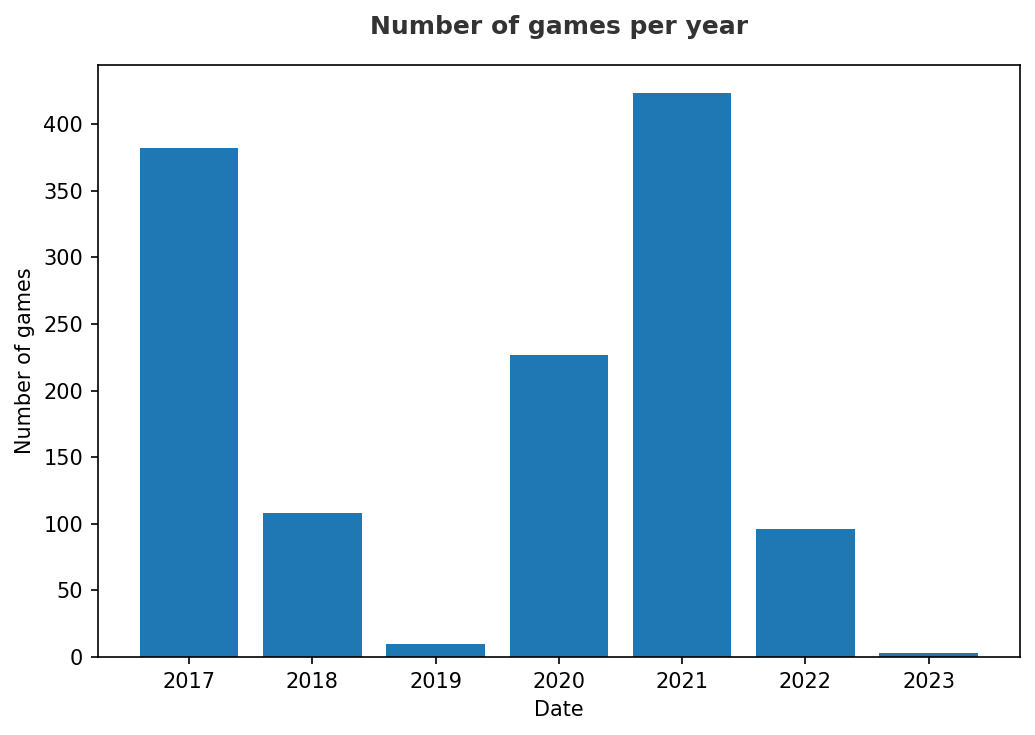

In [7]:
num_of_games_by_year = count_of_games['year'].value_counts()

fig, ax = plt.subplots()

ax.set_xlabel('Date')
ax.set_ylabel('Number of games')
ax.bar(num_of_games_by_year.index, num_of_games_by_year)
ax.set_title('Number of games per year', pad=15, color='#333333',
             weight='bold')

fig.set_size_inches(7, 5)
fig.set_dpi(150)
fig.tight_layout()

plt.show()

### Specified DF by player color and results of chess games

In [8]:
profile = count_of_games['white_player'].mode()[0] # The nickname which is analysed
white_wins = count_of_games.query('white_player == @profile and winner == "white"').copy()
white_wins['status_by_player'] = 1
white_losses = count_of_games.query('white_player == @profile and winner == "black"').copy()
white_losses['status_by_player'] = -1
black_wins = count_of_games.query('black_player == @profile and winner == "black"').copy()
black_wins['status_by_player'] = 1
black_losses = count_of_games.query('black_player == @profile and winner == "white"').copy()
black_losses['status_by_player'] = -1
white_draws = count_of_games.query('winner=="draw" and white_player == @profile').copy()
white_draws['status_by_player'] = 0.5
black_draws = count_of_games.query('winner=="draw" and black_player == @profile').copy()
black_draws['status_by_player'] = 0.5
draws = count_of_games.query('winner=="draw"').copy()

all_wins = pd.concat([white_wins, black_wins])
all_losses = pd.concat([white_losses, black_losses])
all_draws = pd.concat([white_draws, black_draws])

all_games = pd.concat([all_wins, all_losses, all_draws])

### Score by both pieces

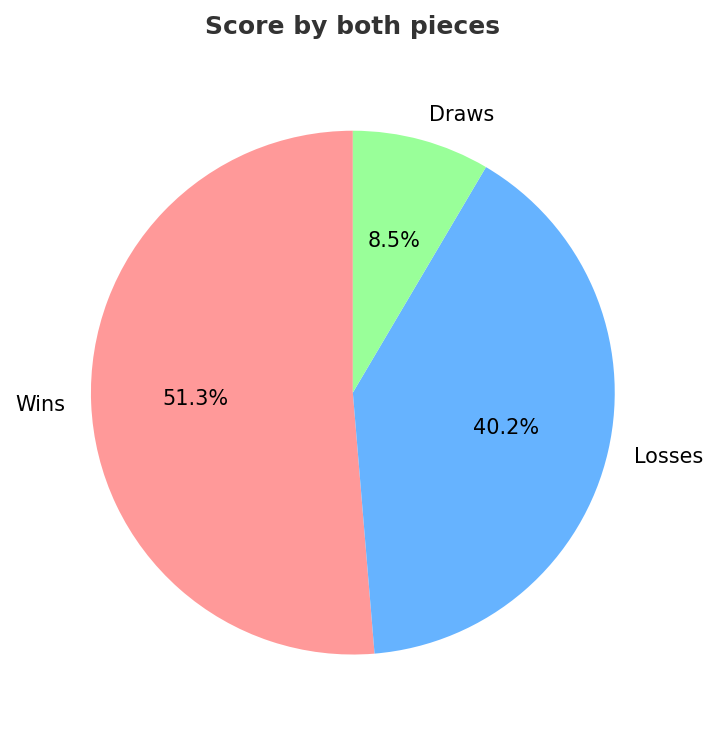

In [9]:
fig, ax1 = plt.subplots()

labels = ['Wins', 'Losses', 'Draws']
colors = ['#ff9999','#66b3ff','#99ff99']
patches, texts, autotexts = ax1.pie([all_wins.shape[0], all_losses.shape[0], draws.shape[0]], 
                                    colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Score by both pieces', pad=15, color='#333333',
             weight='bold')

fig.set_size_inches(7, 5)
fig.set_dpi(150)
fig.tight_layout()

plt.show()

### Score by white pieces

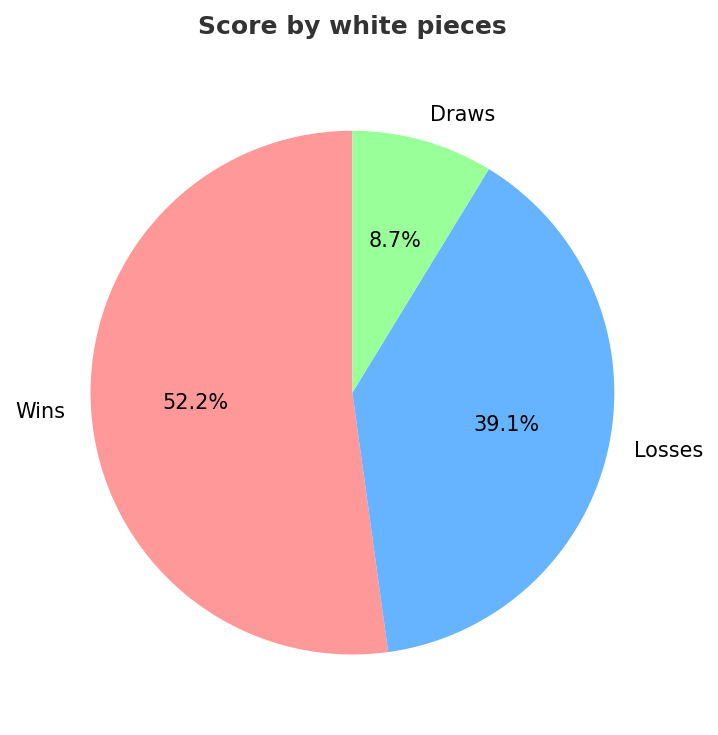

In [10]:
fig, ax1 = plt.subplots()

labels = ['Wins', 'Losses', 'Draws']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
patches, texts, autotexts = ax1.pie([white_wins.shape[0], white_losses.shape[0], white_draws.shape[0]], 
                                    colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Score by white pieces', pad=15, color='#333333',
             weight='bold')

fig.set_size_inches(7, 5)
fig.set_dpi(150)
fig.tight_layout()

plt.show()

### Score by black pieces

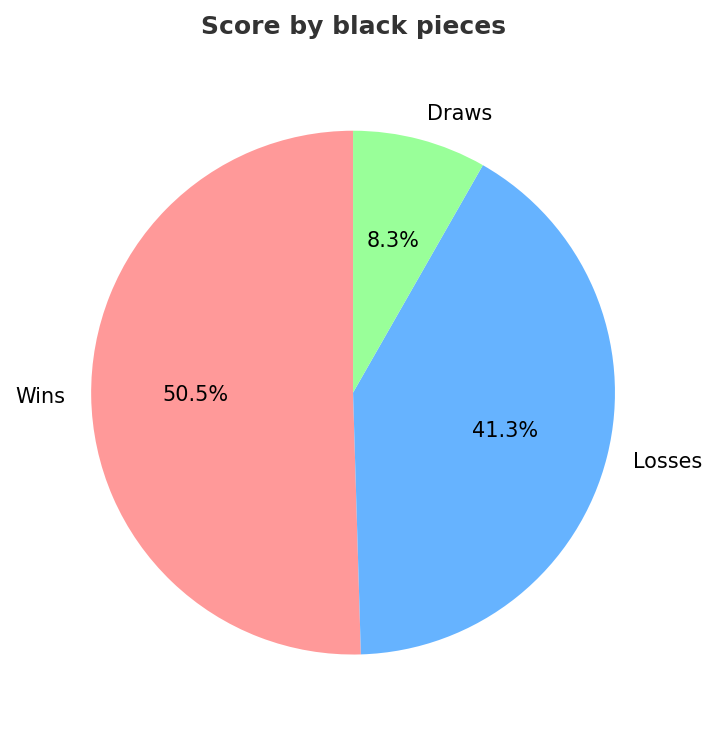

In [11]:
fig, ax1 = plt.subplots()

labels = ['Wins', 'Losses', 'Draws']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
patches, texts, autotexts = ax1.pie([black_wins.shape[0], black_losses.shape[0], black_draws.shape[0]], 
                                    colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Score by black pieces', pad=15, color='#333333',
             weight='bold')

fig.set_size_inches(7, 5)
fig.set_dpi(150)
fig.tight_layout()

plt.show()

### Games won by status - type of ending of game

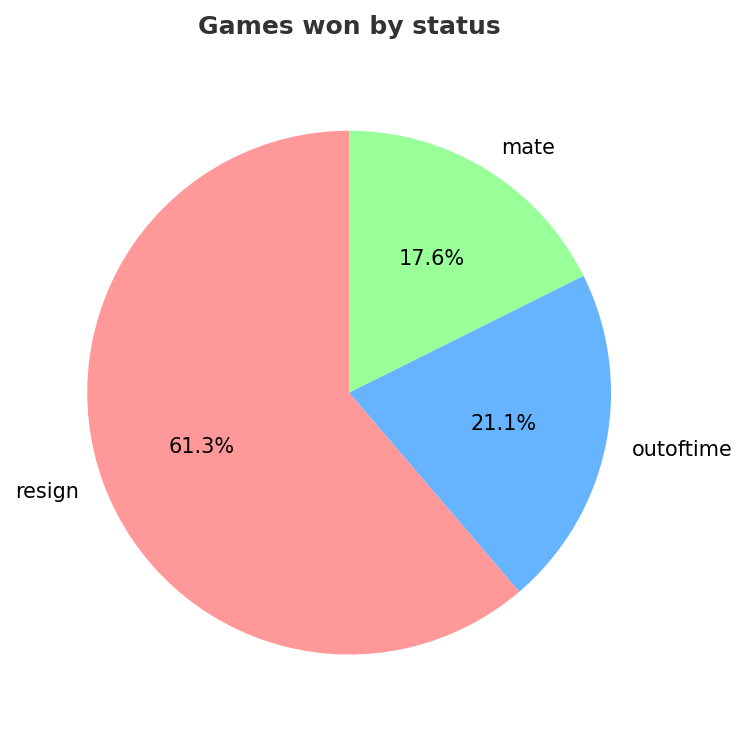

In [12]:
all_wins_status = all_wins['status'].value_counts().iloc[:3] # Other statuses aren't important
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig, ax1 = plt.subplots()

labels = all_wins_status.index
ax1.pie(all_wins_status, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Games won by status', pad=15, color='#333333',
             weight='bold')

fig.set_size_inches(7, 5)
fig.set_dpi(150)
fig.tight_layout()

plt.show()

### Games lost by status - type of ending of game

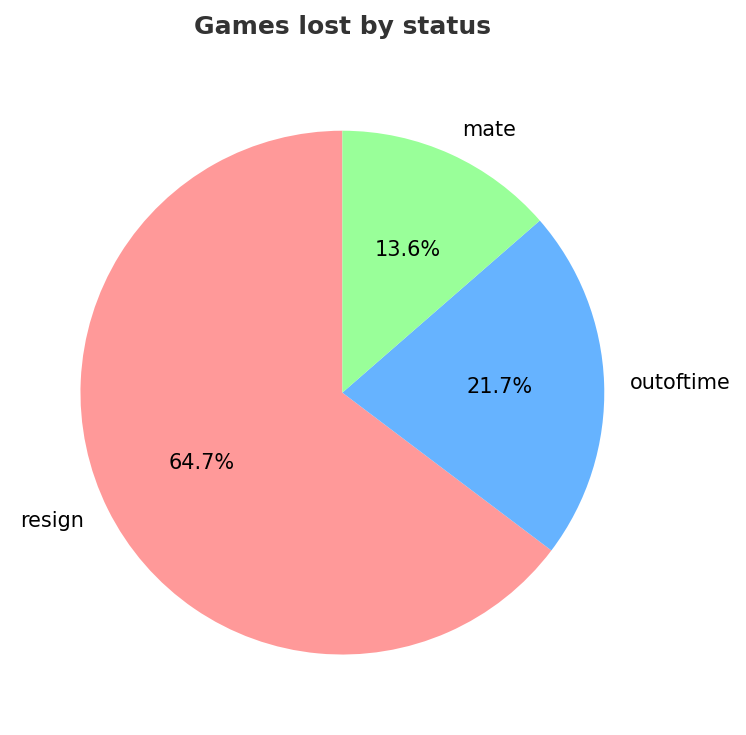

In [13]:
all_losses_status = all_losses['status'].value_counts().iloc[:3] # Other statuses aren't important
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig, ax1 = plt.subplots()

labels = all_losses_status.index
ax1.pie(all_losses_status, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Games lost by status', pad=15, color='#333333',
             weight='bold')

fig.set_size_inches(7, 5)
fig.set_dpi(150)
fig.tight_layout()

plt.show()

### Distribution of games by time duration

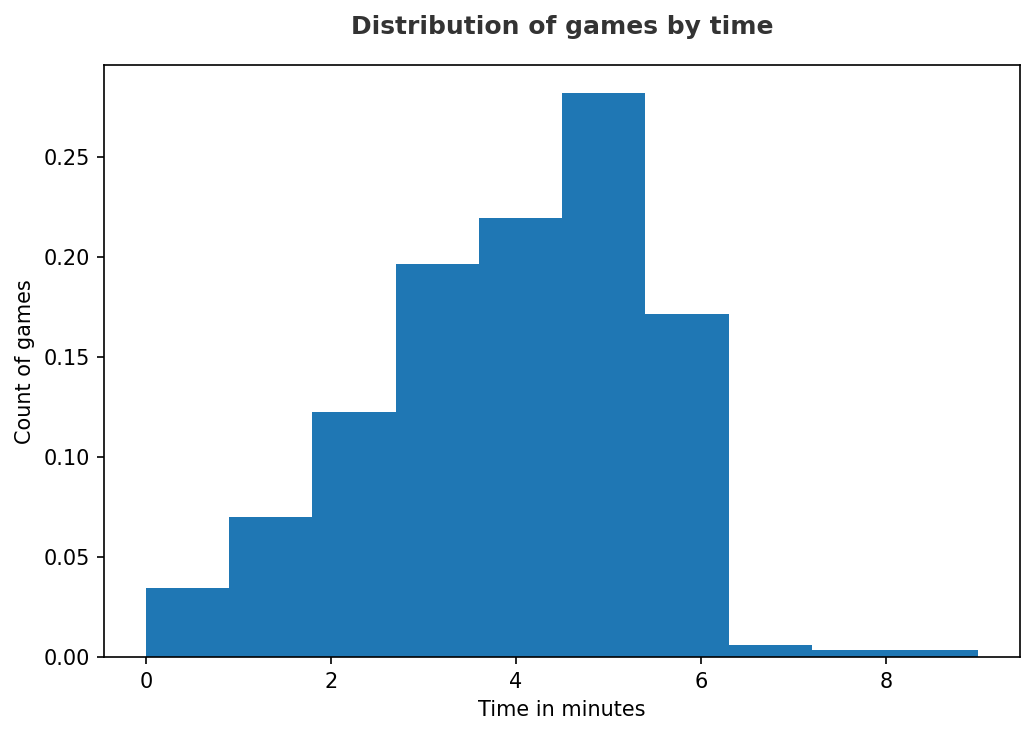

In [14]:
fig, ax = plt.subplots()
ax.hist(my_games['game_duration'].astype('timedelta64[m]'),
       density=True)

ax.set_xlabel("Time in minutes")
ax.set_ylabel('Count of games')

ax.set_title('Distribution of games by time', pad=15, color='#333333',
             weight='bold')

fig.set_size_inches(7, 5)
fig.set_dpi(150)
fig.tight_layout()

plt.show()


### Distribution of games by number of moves

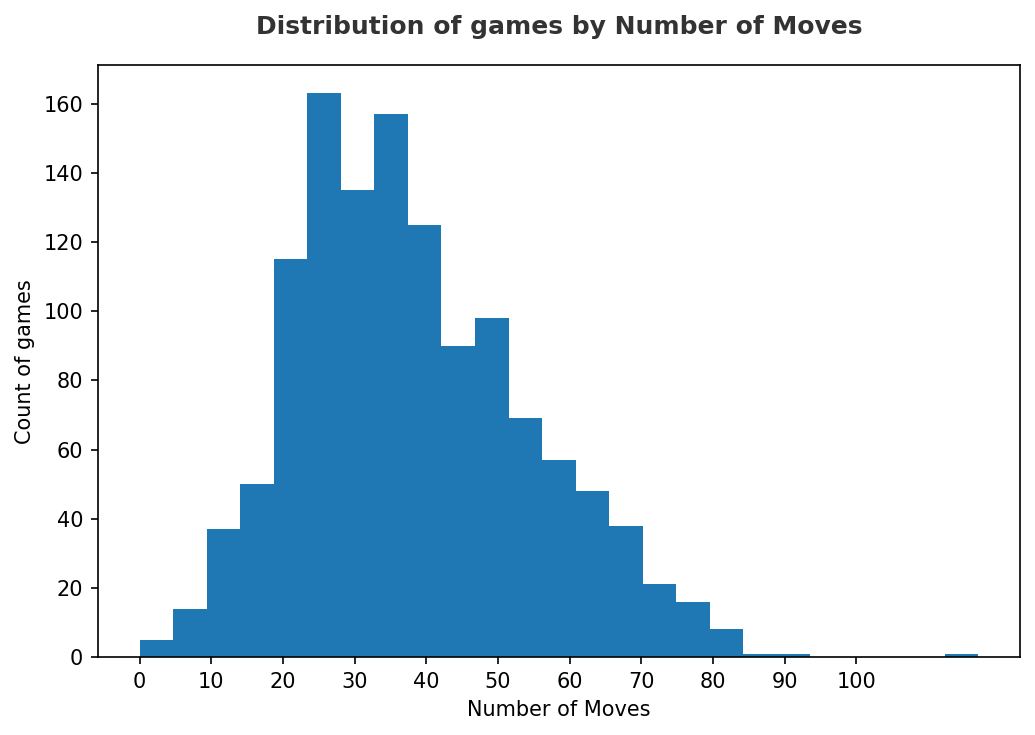

In [15]:
fig, ax = plt.subplots()
ax.hist(my_games['num_of_moves'], bins=25)

ax.set_xlabel("Number of Moves")
ax.set_ylabel('Count of games')

ax.set_title('Distribution of games by Number of Moves', pad=15, color='#333333',
             weight='bold')
ax.set_xticks(np.linspace(0, 100, 11))

fig.set_size_inches(7, 5)
fig.set_dpi(150)
fig.tight_layout()

plt.show()

### Number of chess game by ECO

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_12460\2890487980.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(eco_by_white.index, rotation=45)


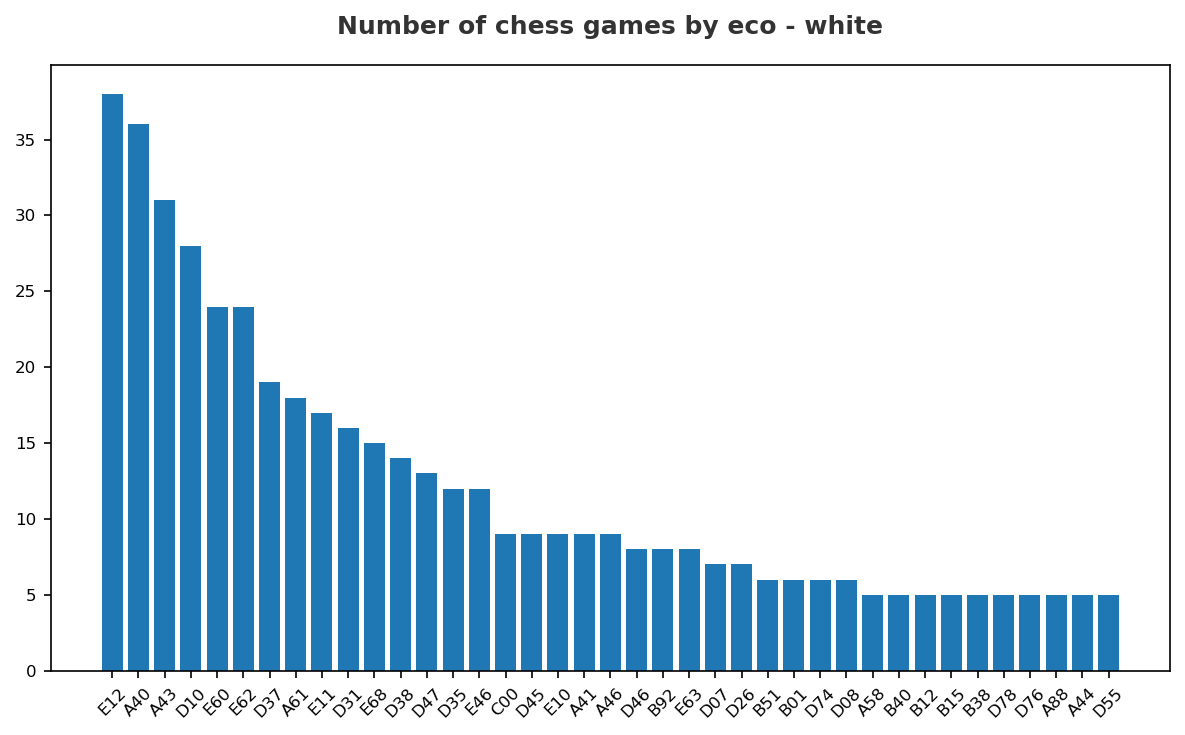

In [16]:
all_white_games = pd.concat([white_wins, white_losses, white_draws])
eco_by_white = all_white_games[all_white_games['eco']!='unknown']
eco_by_white = eco_by_white['eco'].value_counts()
eco_by_white = eco_by_white[eco_by_white>=5]

fig, ax = plt.subplots()
ax.bar(eco_by_white.index, eco_by_white)
ax.set_xticklabels(eco_by_white.index, rotation=45)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_title('Number of chess games by eco - white', pad=15, color='#333333',
             weight='bold')

fig.set_size_inches(8, 5)
fig.set_dpi(150)
fig.tight_layout()

plt.show()

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_12460\2589565034.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(eco_by_black.index, rotation=45)


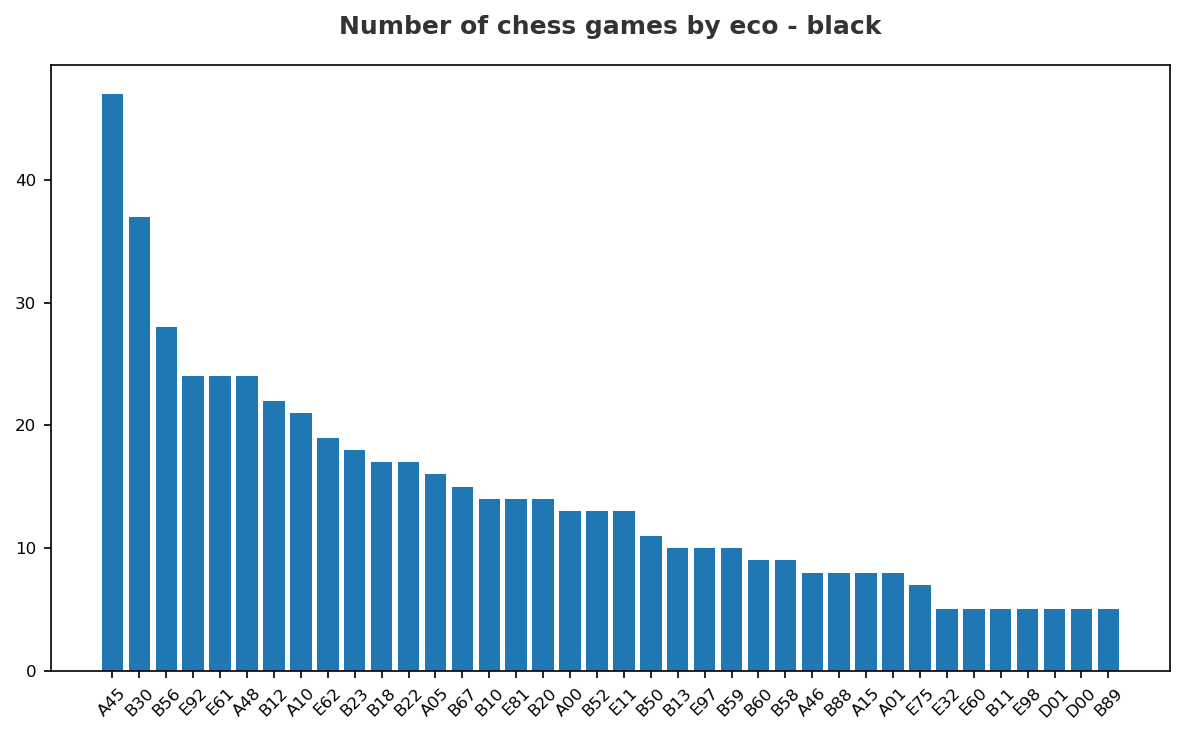

In [17]:
all_black_games = pd.concat([black_wins, black_losses, black_draws])
eco_by_black = all_black_games[all_black_games['eco']!='unknown']
eco_by_black = eco_by_black['eco'].value_counts()
eco_by_black = eco_by_black[eco_by_black>=5]

fig, ax = plt.subplots()
ax.bar(eco_by_black.index, eco_by_black)
ax.set_xticklabels(eco_by_black.index, rotation=45)
ax.tick_params(axis='both', which='major', labelsize=8)

ax.set_title('Number of chess games by eco - black', pad=15, color='#333333',
             weight='bold')

fig.set_size_inches(8, 5)
fig.set_dpi(150)
fig.tight_layout()


## Model

I want to know what are the strongest chess openings and what are the weakest chess opening of my opponent. So, I will help with FIDE formula for rating performance: here is the definition: Performance rating (abbreviated as Rp) in chess is the level a player performed at in a tournament or match based on the number of games played, their total score in those games, and the Elo ratings of their opponents. I modify the formula to be calculated by chess opening and players against whom I played.

\begin{gather*}
Rating Performance = \frac{\text{Total of opponent's rating} + 400*(Wins-Losses)}{\text{Number of games}}
\end{gather*}

In [18]:
def opening_strength(player='white'):
    """Function returns rating performance by player by chess opening"""
    
    if player == 'white':
        oposite = 'black'
    else:
        oposite = 'white'
        
    openings = all_games.query(f'{player}_player==@profile').copy()
    all_games_g = openings[openings['eco']!='unknown'].copy() 
    all_games_g = all_games_g.groupby('eco')[['status_by_player', f'{oposite}_elo']].agg({'status_by_player': ['sum', 'count'],
                                                                                    f'{oposite}_elo': 'sum'})
    all_games_g.columns = ['_'.join(col).strip() for col in all_games_g.columns.values]
    all_games_g = all_games_g[all_games_g['status_by_player_count']>=5]
    # Here is the formula 
    all_games_g['performance'] = (all_games_g[f'{oposite}_elo_sum']+400*(all_games_g['status_by_player_sum'])) / all_games_g['status_by_player_count'] 
    all_games_g = all_games_g.sort_values(by='performance', ascending=False)
    del all_games_g[f'{oposite}_elo_sum']
    all_games_g.columns = ['total_result', 'num_of_games', 'performance']
    
    return all_games_g

In [19]:
# Here is my average rating in Lichess
average_elo = my_rating_history.mean()

### My rating performance sorted by highest to smallest by chess openings with white

In [20]:
rec_white_op = opening_strength(player='white')
rec_white_op

,total_result,num_of_games,performance
eco,,,
B15,3.0,5,2761.800000
E68,12.0,15,2758.466667
B92,4.0,8,2667.750000
E62,12.5,24,2613.041667
E10,5.0,9,2606.777778
E12,13.5,38,2603.526316
A44,2.5,5,2591.000000
A41,2.0,9,2571.111111
D08,0.5,6,2545.666667


### My rating performance sorted by highest to smallest by chess openings with black

In [21]:
rec_black_op = opening_strength(player='black')
rec_black_op

,total_result,num_of_games,performance
eco,,,
A10,13.0,21,2686.666667
E60,3.0,5,2675.600000
E75,4.5,7,2622.000000
A05,7.5,16,2618.562500
E98,2.5,5,2600.200000
B89,3.0,5,2593.000000
B50,4.5,11,2567.818182
B23,3.0,18,2559.166667
A01,3.5,8,2558.125000


In [22]:
# I want to continue playing this opening because I play them stronger than my average rating
good_opening_white = rec_white_op.query('(performance >= @average_elo) or (total_result>=0)')
good_opening_black = rec_black_op.query('(performance >= @average_elo) or (total_result>=0)')

# I need to change these openings because I have a negative score and played them with a performance that is smaller than my average rating
target_opening_white = rec_white_op.query('(performance < @average_elo) or (total_result<0)')
target_opening_black = rec_black_op.query('(performance < @average_elo) or (total_result<0)')

In [23]:
good_opening_white

,total_result,num_of_games,performance
eco,,,
B15,3.0,5,2761.800000
E68,12.0,15,2758.466667
B92,4.0,8,2667.750000
E62,12.5,24,2613.041667
E10,5.0,9,2606.777778
E12,13.5,38,2603.526316
A44,2.5,5,2591.000000
A41,2.0,9,2571.111111
D08,0.5,6,2545.666667


I have to change these openings with white pieces

In [24]:
target_opening_white

,total_result,num_of_games,performance
eco,,,
C00,-1.0,9,2448.444444
B40,-1.0,5,2417.000000
A61,-2.5,18,2400.055556
D76,-1.0,5,2399.600000
E63,-2.0,8,2386.750000
E60,-2.5,24,2374.333333
B12,-1.0,5,2365.000000
D38,-0.5,14,2355.142857
B51,-2.0,6,2347.833333


I have to change these openings with black pieces.

In [25]:
target_opening_black

,total_result,num_of_games,performance
eco,,,
E62,-0.5,19,2452.315789
B88,-2.0,8,2387.500000
A45,-5.5,47,2360.085106
B60,-3.5,9,2340.222222
B20,-0.5,14,2325.785714
B18,-1.5,17,2316.647059
E97,-4.0,10,2290.500000
B10,-3.0,14,2230.000000
B13,-2.5,10,2206.200000


## Conclusion

This model has two purposes:
1. It helps to improve your opening repertoire by changing openings where is the score negative or rating performance is under the average rating.
2. It helps to prepare against opponents by finding their weakest opening.